In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('../../../DATASET/Iris.csv')

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df = df.iloc[:,1:]

In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
# df['Species'] = encoder.fit_transform(df['Species'])
df['Species'] = encoder.fit_transform(df['Species'])

In [63]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
df = df[df['Species'] != 0] [['SepalWidthCm','PetalLengthCm','Species']]

In [65]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

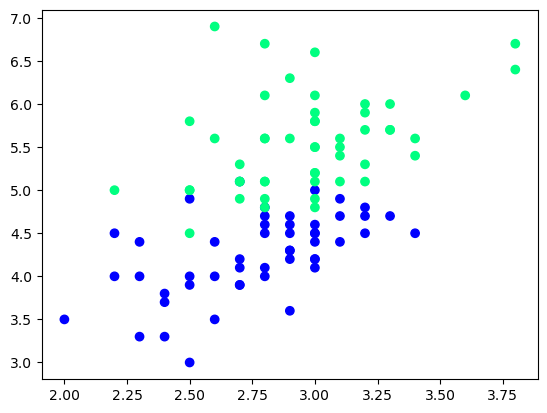

In [70]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [71]:
# Taking only 10 rows for training
# Taking 100 random rows from data 
df = df.sample(100)
# Subset for Training data
df_train = df.iloc[:60,:].sample(10)
# Subset for testing data
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [72]:
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
108,2.5,5.8,2
119,2.2,5.0,2
109,3.6,6.1,2
81,2.4,3.7,1
53,2.3,4.0,1
90,2.6,4.4,1
97,2.9,4.3,1
123,2.7,4.9,2
146,2.5,5.0,2


In [73]:
df_val

,SepalWidthCm,PetalLengthCm,Species
116,3.0,5.5,2
92,2.6,4.0,1
50,3.2,4.7,1
118,2.6,6.9,2
103,2.9,5.6,2


In [74]:
df_test

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
95,3.0,4.2,1
111,2.7,5.3,2
135,3.0,6.1,2
128,2.8,5.6,2


In [75]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [76]:
X_test.size
# X_test will have 10 rows

10

## Case 1 - Bagging

In [77]:
# We'll train 3 Decision Tree with different data

In [78]:
# Data for Tree 1 -- well give 80% i.e. 8 rows out of 10 rows
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
97,2.9,4.3,1
97,2.9,4.3,1
123,2.7,4.9,2
109,3.6,6.1,2
121,2.8,4.9,2
119,2.2,5.0,2
146,2.5,5.0,2


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [80]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [81]:
dt_bag1 = DecisionTreeClassifier()

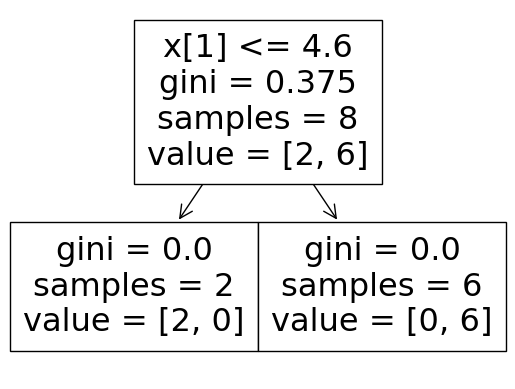

0.8


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


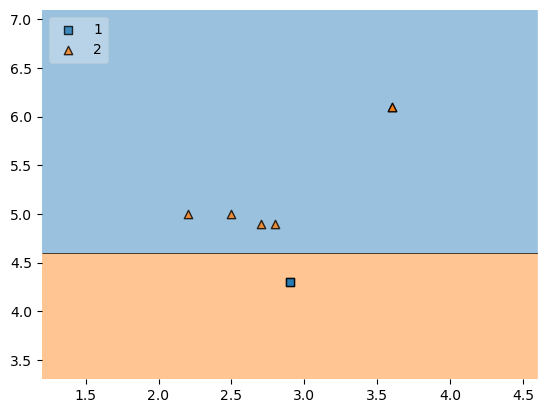

In [82]:
evaluate(dt_bag1,X,y)

In [83]:
# Data for Tree 2 -- well give 80% 
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
53,2.3,4.0,1
123,2.7,4.9,2
108,2.5,5.8,2
81,2.4,3.7,1
146,2.5,5.0,2
90,2.6,4.4,1
81,2.4,3.7,1
90,2.6,4.4,1


In [84]:
dt_bag2 = DecisionTreeClassifier()

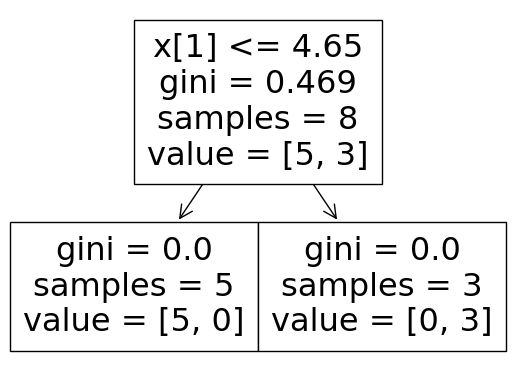

0.8


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


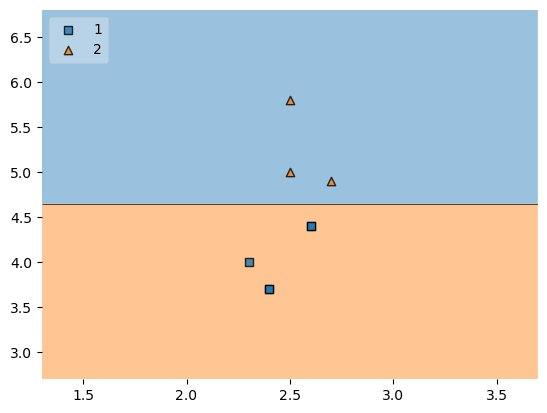

In [85]:
evaluate(dt_bag2,X,y)

In [86]:
# Data for Tree 3 -- well give 80% 
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
146,2.5,5.0,2
81,2.4,3.7,1
53,2.3,4.0,1
97,2.9,4.3,1
97,2.9,4.3,1
108,2.5,5.8,2
53,2.3,4.0,1


In [87]:
dt_bag3 = DecisionTreeClassifier()

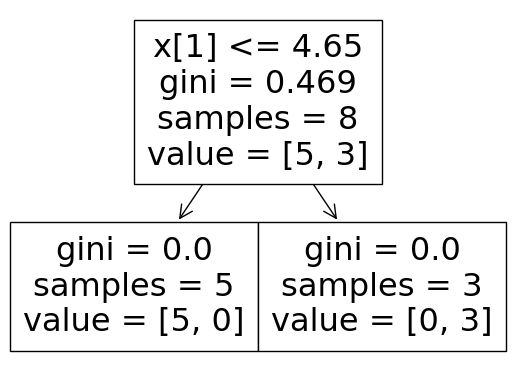

0.8


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


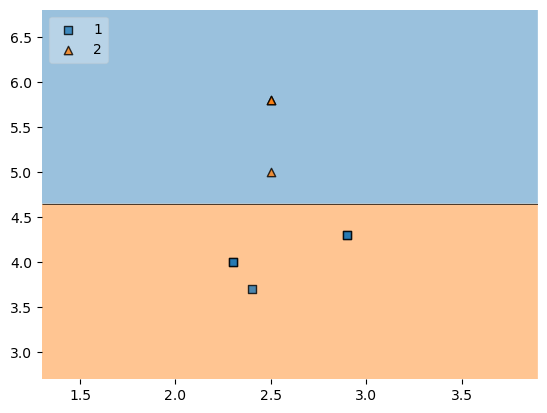

In [88]:
evaluate(dt_bag3,X,y)

## Predict

In [89]:
df_test

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
95,3.0,4.2,1
111,2.7,5.3,2
135,3.0,6.1,2
128,2.8,5.6,2


In [90]:
# Feeding the first rows for prediction manually

In [93]:
print("Predictor 1",dt_bag1.predict(np.array([2.5,4.0]).reshape(1,2)))
print("Predictor 1",dt_bag2.predict(np.array([2.5,4.0]).reshape(1,2)))
print("Predictor 1",dt_bag3.predict(np.array([2.5,4.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 1 [1]
Predictor 1 [1]


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [94]:
# For first row all 3 model gives 1 so 1 is the output
# Lets try for different row
print("Predictor 1",dt_bag1.predict(np.array([3.0,6.1]).reshape(1,2)))
print("Predictor 1",dt_bag2.predict(np.array([3.0,6.1]).reshape(1,2)))
print("Predictor 1",dt_bag3.predict(np.array([3.0,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 1 [2]
Predictor 1 [2]


c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\godsc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Types of Bagging -- 

## 1. Pasting

In [95]:
# Row Sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
108,2.5,5.8,2
119,2.2,5.0,2
109,3.6,6.1,2
81,2.4,3.7,1
53,2.3,4.0,1
90,2.6,4.4,1
97,2.9,4.3,1
123,2.7,4.9,2
146,2.5,5.0,2


In [96]:
df_train.sample(8)
# sample helps to take rows withot repetition

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
97,2.9,4.3,1
123,2.7,4.9,2
53,2.3,4.0,1
119,2.2,5.0,2
108,2.5,5.8,2
121,2.8,4.9,2
146,2.5,5.0,2


## 2. Random Subspaces

In [98]:
# Column sampling with or without replacement
df1 = pd.read_csv('../../../DATASET/Iris.csv')
df1 = df1.sample(10)

In [99]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor


In [102]:
df1.sample(2,replace=True,axis=1)
# Axis = 1 menas column sampling -- every time different column will apperar

,SepalLengthCm,Id
70,5.9,71
48,5.3,49
35,5.0,36
22,4.6,23
122,7.7,123
20,5.4,21
3,4.6,4
135,7.7,136
71,6.1,72
53,5.5,54


## 3. Random Patches

In [104]:
#  Row and column sampling both 
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor


In [106]:
# Both row and column sampling together
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,PetalLengthCm
71,2.8,4.0
48,3.7,1.5
70,3.2,4.8
53,2.3,4.0
71,2.8,4.0
70,3.2,4.8
53,2.3,4.0
135,3.0,6.1
